# Assignment 1: Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Download and Unzip the Sample Data


Your first task is to download a dataset containing counts of terms in documents from "https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true". The dataset covers the first one million tokens in the collection.

In [3]:
# TODO: Download a zipped JSON file from Github. (1 points)
# Hints: use "!wget"
#need to do this

!wsl wget "https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true" -O ap201001.json.gz  

--2023-09-30 14:45:01--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2023-09-30 14:45:02--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2023-09-30 14:45:02--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response..

In [2]:
# TODO: Unzip the file to access the JSON data. Make sure you have a file named ap201001.json after unzipping. (1 points)
# Hints: use "!gunzip"
#need to do this

!wsl gunzip ap201001.json.gz



gzip: ap201001.json already exists;	not overwritten


In [1]:
import json
# TODO: Convert ap201001.json file with one JSON record on each line to a list of dictionaries.(1 points)

rawfile= open('ap201001.json')
terms = [json.loads(line) for line in rawfile]


Now that you've successfully downloaded and unzipped the data, let's dig deeper. Your task is to explore some basic statistics about the terms in our dataset. This will give you a better understanding of the data you're working with.

Find the first 10 terms from the document. In this dataset, field only takes the values `body` or `title`.

In [5]:
# TODO: Find first 10 terms. (2 points)
# Hints: use "terms"

terms[1:10]


[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Your answer shoule be like:
"[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 ...}]"

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [8]:
# TODO: Print the 10 terms from document APW_ENG_20100101.0001 with the highest count. (5 points)

import pandas as pd

filtered_dicts = [d for d in terms if d['id'] == 'APW_ENG_20100101.0001']
df = pd.DataFrame(filtered_dicts)
top_10_terms = df.sort_values(by='count', ascending=False).head(10)
top_10_terms




,id,field,term,count
0,APW_ENG_20100101.0001,body,a,16
192,APW_ENG_20100101.0001,body,the,11
133,APW_ENG_20100101.0001,body,of,10
198,APW_ENG_20100101.0001,body,to,10
34,APW_ENG_20100101.0001,body,brooks,10
15,APW_ENG_20100101.0001,body,and,10
95,APW_ENG_20100101.0001,body,in,9
86,APW_ENG_20100101.0001,body,he,9
81,APW_ENG_20100101.0001,body,gomez,8
164,APW_ENG_20100101.0001,body,said,6


In [10]:
# TODO: Print the 10 terms with the highest total count in the corpus. (5 points)

frequency = []
terms_set = set()
distinct_terms_to_frequency_dict = {}

for d in terms:

    if d['term'] in terms_set:

        distinct_terms_to_frequency_dict[d['term']] += d['count']

    else:

        distinct_terms_to_frequency_dict[d['term']] = d['count']
        terms_set.add(d['term'])

frequency = [(term, count) for term, count in distinct_terms_to_frequency_dict.items()]
sorted_frequency = sorted(frequency, key = lambda x : x[1], reverse=True)
print(sorted_frequency[:10])




[('the', 62216), ('to', 26931), ('in', 25659), ('a', 23383), ('of', 22326), ('and', 22125), ('said', 10888), ('for', 9716), ('on', 9382), ('that', 8942)]


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [11]:
# TODO: Compute the number of distinct documents in the collection. (5 points)
N = 0

def number_of_distinct_documents():

    distinct_doc_ids = set()

    for dict in terms:
        distinct_doc_ids.add(dict['id'])
    
    return len(distinct_doc_ids)

N = number_of_distinct_documents()

print(N)

2778


In [20]:
# TODO: Compute the number of distinct documents each term appears in 
# and store in a dictionary. (5 points)

def compute_term_document_counts():

    term_to_distinct_documents_dict = {}

    for d in terms:

        term = d['term']
        doc_id = d['id']

        if term in term_to_distinct_documents_dict:

            if doc_id not in term_to_distinct_documents_dict[term]:

                term_to_distinct_documents_dict[term].add(doc_id)
            
        else:

            term_to_distinct_documents_dict[term] = {doc_id}
        
    return term_to_distinct_documents_dict
        

df = compute_term_document_counts()

for key, value in df.items():
    df[key] = len(value)
      
print(df)

{'a': 2571, 'about': 1077, 'abuse': 26, 'academy': 20, 'accused': 201, 'actress': 23, 'ad': 16, 'after': 1484, 'agenda': 16, 'agreed': 163, 'all': 708, 'along': 220, 'already': 321, 'also': 1103, 'an': 1631, 'and': 2521, 'apartment': 41, 'approved': 56, 'arnold': 9, 'arrange': 6, 'as': 1615, 'assaulting': 2, 'at': 2020, 'audition': 1, 'awaiting': 16, 'award': 28, 'bail': 23, 'ballad': 3, 'being': 524, 'benz': 4, 'best': 193, 'between': 520, 'boone': 1, 'borrowed': 13, 'brooks': 9, 'but': 1499, 'by': 1760, 'came': 317, 'cash': 153, 'casting': 4, 'certificate': 3, 'charged': 172, 'charges': 177, 'comedian': 7, 'comedy': 10, 'comment': 237, 'companionship': 1, 'composer': 5, 'concerns': 129, 'conning': 1, 'couch': 4, 'could': 753, 'court': 287, 'daddy': 1, 'damages': 21, 'deal': 227, 'debby': 1, 'declined': 157, "didn't": 258, 'directed': 66, 'director': 215, 'disputed': 56, 'divorce': 4, 'dreams': 10, 'e': 102, 'each': 233, 'ended': 168, 'engagement': 8, 'even': 365, 'ex': 40, 'fact': 88

In [21]:
# TODO: Print the relative document frequency of 'the', (5 points)
# i.e., the number of documents that contain 'the' divided by N.

#final answer is 98%

print(df['the'] / N)

0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [22]:
# TODO: Compute the tf-idf value for each term in each document. (10 points)
# Take the raw term data and add a tfidf field to each record.

import math

tfidf_terms = None

for d in terms:
    tf= math.log(d['count'] + 1, 10)
    idf = math.log(N / df[d['term']], 10)
    tfidf = tf*idf

    d['tfidf'] = math.log(d['count'] + 1, 10) * math.log(N / df[d['term']], 10)

tfidf_terms = terms

print(tfidf_terms[:10])



[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'a', 'count': 16, 'tfidf': 0.041380199953160515}, {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1, 'tfidf': 0.12387882168098781}, {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1, 'tfidf': 0.6107172808927305}, {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'academy', 'count': 1, 'tfidf': 0.645017647743597}, {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'accused', 'count': 2, 'tfidf': 0.544174055154242}, {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'actress', 'count': 1, 'tfidf': 0.6267457771251362}, {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1, 'tfidf': 0.6741904685392086}, {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1, 'tfidf': 0.08196996824755816}, {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'agenda', 'count': 1, 'tfidf': 0.6741904685392086}, {'id': 'APW_ENG_20100101

In [46]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values. (5 points)

# bigger than 1 but less than my current answer of 7.49 ??
# are my values correct ?


df = pd.DataFrame(tfidf_terms)

top_20_term_document_pairs_list = df.sort_values(by='tfidf', ascending=False).head(20)

top_20_term_document_pairs_list



,id,field,term,count,tfidf
52727,APW_ENG_20100103.0028,body,guarani,24,4.393309
199263,APW_ENG_20100105.0061,body,nomination,95,4.247417
234566,APW_ENG_20100105.0446,body,methane,15,4.146667
192483,APW_ENG_20100105.0014,body,greyhound,14,4.050143
48925,APW_ENG_20100103.0015,body,kheire,14,4.050143
433679,APW_ENG_20100107.0036,body,shakespeare,18,4.018742
199179,APW_ENG_20100105.0061,body,guild,28,3.898140
342740,APW_ENG_20100106.0428,body,shakespeare,16,3.866935
305769,APW_ENG_20100106.0075,body,magna,12,3.836123
21195,APW_ENG_20100102.0197,body,elkhart,12,3.836123


## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [23]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216. (5 points)

frequency = []

terms_set = set()

distinct_terms_to_frequency_dict = {}

for d in terms:

    if d['term'] in terms_set:

        distinct_terms_to_frequency_dict[d['term']] += d['count']

    else:

        distinct_terms_to_frequency_dict[d['term']] = d['count']
        terms_set.add(d['term'])


frequency = [(term, count) for term, count in distinct_terms_to_frequency_dict.items()]

sorted_frequency = sorted(frequency, key = lambda x : x[1], reverse=True)

print(sorted_frequency)




[('the', 62216), ('to', 26931), ('in', 25659), ('a', 23383), ('of', 22326), ('and', 22125), ('said', 10888), ('for', 9716), ('on', 9382), ('that', 8942), ('was', 7791), ('is', 6317), ('with', 6283), ('at', 6078), ('he', 5874), ('it', 5357), ('from', 5094), ('as', 4746), ('by', 4641), ('has', 4355), ('an', 4087), ('have', 4012), ('his', 3904), ('be', 3693), ('but', 3638), ('s', 3567), ('u', 3518), ('were', 3478), ('not', 3320), ('are', 3218), ('will', 3063), ('its', 2955), ('who', 2904), ('had', 2900), ('after', 2876), ('year', 2816), ('they', 2423), ('this', 2331), ('new', 2263), ('been', 2241), ('more', 2225), ('two', 2136), ('security', 2097), ('or', 2076), ('which', 2059), ('about', 2003), ('percent', 1966), ('up', 1917), ('their', 1898), ('al', 1897), ('would', 1851), ('also', 1826), ('last', 1807), ('first', 1761), ('than', 1748), ('i', 1722), ('one', 1717), ('other', 1680), ('people', 1678), ('out', 1677), ('government', 1659), ('officials', 1628), ('over', 1626), ('when', 1622),

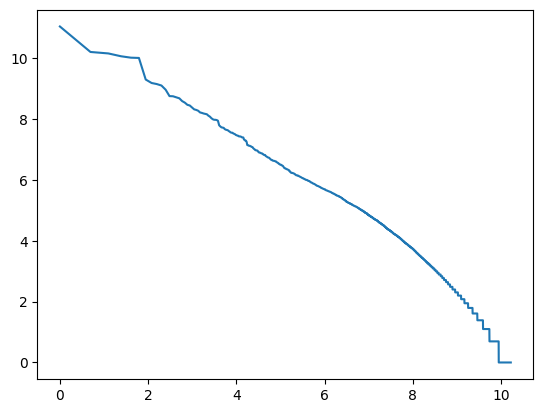

In [24]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library. (5 points)

# is this correct ?

import matplotlib.pyplot as plt
import numpy as np

x_val = list(range(1, len(sorted_frequency) + 1))

y_val = [element[1] for element in sorted_frequency]

log_rank = np.log(x_val)
log_frequency = np.log(y_val)


plt.plot(log_rank, log_frequency )

In [25]:
# TODO: Compute the number of tokens in the corpus. (5 points)
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.


ntokens = 0

for element in sorted_frequency:

    ntokens += element[1]

print(ntokens)


1000000


In [26]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words. (5 points)

top_10_most_frequent_words_total = 0

for i in range(10):

    top_10_most_frequent_words_total += sorted_frequency[i][1]

print(top_10_most_frequent_words_total / ntokens)



0.221568


In [27]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection. (5 points)

words_that_occur_exactly_once = 0

for element in sorted_frequency:

    if element[1] == 1:

        words_that_occur_exactly_once += 1

print(words_that_occur_exactly_once / ntokens)
    

0.006641



For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

In [60]:
# TODO: Write code to download and extract the text from the collection.  (5 points)
import kaggle
import os

!wsl wget "https://www.kaggle.com/datasets/jensenbaxter/10dataset-text-document-classification"



--2023-09-28 16:22:17--  https://www.kaggle.com/datasets/jensenbaxter/10dataset-text-document-classification
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘10dataset-text-document-classification.3’

     0K ..........                                              862K=0.01s

2023-09-28 16:22:17 (862 KB/s) - ‘10dataset-text-document-classification.3’ saved [10682]



**TODO**: Describe choices you make about what contents to keep. (2 points)

I want to keep every word. I want to remove all punctuation such as commas, and periods.



In [28]:
# TODO: Data acquisition code here. (5 points)

import os
import glob

directory_path = r"C:\Users\vijay\Desktop\6200 Projects\Assignment 1\sport"

file_paths = glob.glob(os.path.join(directory_path, '*'))

list_of_dicts = []
term_to_frequency_in_document_dict = {}

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            tokens = line.strip().split()
            for token in tokens:
                element = dict()
                element['id'] = os.path.basename(file_path)
                element['term'] = token
                
                term_to_frequency_in_document_dict[token] = term_to_frequency_in_document_dict.get(token, 0) + 1
                list_of_dicts.append(element)

for element in list_of_dicts:
    element['count'] = term_to_frequency_in_document_dict[element['term']]

print(list_of_dicts[:100])




[{'id': 'sport_1.txt', 'term': 'Claxton', 'count': 9}, {'id': 'sport_1.txt', 'term': 'hunting', 'count': 1}, {'id': 'sport_1.txt', 'term': 'first', 'count': 49}, {'id': 'sport_1.txt', 'term': 'major', 'count': 17}, {'id': 'sport_1.txt', 'term': 'medal', 'count': 28}, {'id': 'sport_1.txt', 'term': 'British', 'count': 55}, {'id': 'sport_1.txt', 'term': 'hurdler', 'count': 4}, {'id': 'sport_1.txt', 'term': 'Sarah', 'count': 6}, {'id': 'sport_1.txt', 'term': 'Claxton', 'count': 9}, {'id': 'sport_1.txt', 'term': 'is', 'count': 269}, {'id': 'sport_1.txt', 'term': 'confident', 'count': 10}, {'id': 'sport_1.txt', 'term': 'she', 'count': 164}, {'id': 'sport_1.txt', 'term': 'can', 'count': 53}, {'id': 'sport_1.txt', 'term': 'win', 'count': 58}, {'id': 'sport_1.txt', 'term': 'her', 'count': 169}, {'id': 'sport_1.txt', 'term': 'first', 'count': 49}, {'id': 'sport_1.txt', 'term': 'major', 'count': 17}, {'id': 'sport_1.txt', 'term': 'medal', 'count': 28}, {'id': 'sport_1.txt', 'term': 'at', 'count':

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [29]:
# TODO: Tokenization code here. (5 points)

import string

translator = str.maketrans('', '', string.punctuation)

cleaned_tokens = []

for d in list_of_dicts:

    cleaned_token = d['term'].translate(translator)

    if cleaned_token:

        cleaned_tokens.append(cleaned_token)

print(cleaned_tokens)

['Claxton', 'hunting', 'first', 'major', 'medal', 'British', 'hurdler', 'Sarah', 'Claxton', 'is', 'confident', 'she', 'can', 'win', 'her', 'first', 'major', 'medal', 'at', 'next', 'months', 'European', 'Indoor', 'Championships', 'in', 'Madrid', 'The', '25yearold', 'has', 'already', 'smashed', 'the', 'British', 'record', 'over', '60m', 'hurdles', 'twice', 'this', 'season', 'setting', 'a', 'new', 'mark', 'of', '796', 'seconds', 'to', 'win', 'the', 'AAAs', 'title', 'I', 'am', 'quite', 'confident', 'said', 'Claxton', 'But', 'I', 'take', 'each', 'race', 'as', 'it', 'comes', 'As', 'long', 'as', 'I', 'keep', 'up', 'my', 'training', 'but', 'not', 'do', 'too', 'much', 'I', 'think', 'there', 'is', 'a', 'chance', 'of', 'a', 'medal', 'Claxton', 'has', 'won', 'the', 'national', '60m', 'hurdles', 'title', 'for', 'the', 'past', 'three', 'years', 'but', 'has', 'struggled', 'to', 'translate', 'her', 'domestic', 'success', 'to', 'the', 'international', 'stage', 'Now', 'the', 'Scotlandborn', 'athlete', '

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections? (2 points)


x_val = list(range(1, len(sorted_frequency) + 1))

y_val = [element[1] for element in sorted_frequency]

log_rank = np.log(x_val)
log_frequency = np.log(y_val)


plt.plot(log_rank, log_frequency )



# Inverted Index
Create an inverted index of the data in the corpus

In [31]:
#To Do : Create an inverted index of the corpus extracted in the 1st part. (10 points)

def create_inverted_index ():

  inverted_index = {}

  for element in list_of_dicts:

    if element['term'] in inverted_index :

      if element['id'] in inverted_index[element['term']] :

        inverted_index[element['term']][element['id']] += 1
      
      else :

        inverted_index[element['term']][element['id']] = 1
    
    else:
      inverted_index[element['term']] = {} 


  return inverted_index


inverted_index = create_inverted_index()

print(inverted_index)


{'Claxton': {'sport_1.txt': 5, 'sport_58.txt': 1, 'sport_60.txt': 1, 'sport_68.txt': 1}, 'hunting': {}, 'first': {'sport_1.txt': 2, 'sport_14.txt': 1, 'sport_2.txt': 1, 'sport_22.txt': 1, 'sport_25.txt': 1, 'sport_26.txt': 1, 'sport_34.txt': 1, 'sport_35.txt': 1, 'sport_40.txt': 1, 'sport_42.txt': 1, 'sport_44.txt': 2, 'sport_52.txt': 1, 'sport_53.txt': 1, 'sport_57.txt': 2, 'sport_58.txt': 3, 'sport_60.txt': 1, 'sport_61.txt': 4, 'sport_66.txt': 5, 'sport_68.txt': 2, 'sport_69.txt': 1, 'sport_71.txt': 1, 'sport_75.txt': 3, 'sport_76.txt': 2, 'sport_83.txt': 1, 'sport_84.txt': 1, 'sport_85.txt': 1, 'sport_86.txt': 1, 'sport_89.txt': 1, 'sport_9.txt': 1, 'sport_93.txt': 1, 'sport_95.txt': 1, 'sport_96.txt': 1}, 'major': {'sport_1.txt': 1, 'sport_14.txt': 2, 'sport_15.txt': 2, 'sport_30.txt': 1, 'sport_40.txt': 1, 'sport_57.txt': 2, 'sport_58.txt': 1, 'sport_61.txt': 1, 'sport_63.txt': 1, 'sport_68.txt': 1, 'sport_71.txt': 1, 'sport_75.txt': 1, 'sport_91.txt': 1}, 'medal': {'sport_1.txt'

In [33]:
# TODO: Write unit tests to validate your inverted index. (5 points)
# function 'search'
# seach(dict,'win')
#output :  ['win':{'sport1.txt','sport2.txt',5,8}]

import unittest

class MyTestCases(unittest.TestCase):

    def test_token_1(self):

        result = inverted_index['Claxton'] 
        expected_value = {'sport_1.txt': 5, 'sport_58.txt': 1, 'sport_60.txt': 1, 'sport_68.txt': 1}  
        self.assertEqual(result, expected_value)

if __name__ == '__main__':

    unittest.main()

usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument 'c:\\Users\\vijay\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-29012F5v6zbjbud6W.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'